# Bank Customers Direct Marketing Campaign Analysis 

## Importing Libraries 

In [1]:
import os
import pandas as pd
import numpy as np
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#Copying the path 
os.chdir(r"/Users/apple/Documents/Purdue/1. Fall Semester/Module 1 /4. Python course/Final project/")
warnings.filterwarnings('ignore')

# Importing the Data 

In [3]:
# Reading the data (We can give the sep = ',' to directly read the data into columns. 
df = pd.read_csv("Churn_Modelling.csv", sep = ',')
df.head()

RowNumber  CustomerId  Surname  CreditScore Geography  Gender   Age  \
0         42    15738148   Clarke        465.0    France  Female  51.0   
1         44    15755196   Lavine        834.0    France  Female  49.0   
2         53    15683553  O'Brien        788.0        Fr       F  33.0   
3         81    15706021    Buley          NaN        Fr       F  34.0   
4         83    15641732    Mills          NaN        Fr       F  36.0   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     8.0  122522.32            1.0        0.0             0.0   
1     2.0  131394.56            1.0        0.0             0.0   
2     5.0       0.00            2.0        0.0             0.0   
3     1.0   96645.54            2.0        0.0             0.0   
4     NaN       0.00            2.0        0.0             0.0   

   EstimatedSalary  Exited  
0        181297.65       1  
1        194365.76       1  
2        116978.19       0  
3        171413.66       0  
4         26019.59       0

**Summary Statistics**

In [4]:
#Check the summary statistics 
df.describe()
df.shape

(10000, 14)

**Splitting the columns to numerical and categorical**

In [5]:
num_cols=['CreditScore','Age',"Tenure","Balance","NumOfProducts","EstimatedSalary"]
cat_cols=['Geography','Gender','HasCrCard','IsActiveMember','Exited']

In [6]:
df = df.replace('NULL', np.NaN)
for i in num_cols:
    try:
        df[i]=df[i].astype(int)
    except:
        df[i]=df[i].astype(float)

In [7]:
df.describe()

RowNumber    CustomerId  CreditScore          Age       Tenure  \
count  10000.00000  1.000000e+04  9848.000000  9637.000000  9978.000000   
mean    5000.50000  1.569094e+07   650.462530    38.919685     5.015033   
std     2886.89568  7.193619e+04    96.593717    10.471967     2.891540   
min        1.00000  1.556570e+07   350.000000    18.000000     0.000000   
25%     2500.75000  1.562853e+07   584.000000    32.000000     3.000000   
50%     5000.50000  1.569074e+07   652.000000    37.000000     5.000000   
75%     7500.25000  1.575323e+07   717.000000    44.000000     7.750000   
max    10000.00000  1.581569e+07   850.000000    92.000000    10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count    9990.000000    9943.000000  9918.000000     9911.000000   
mean    76428.280420       1.530725     0.728776        0.515589   
std     62389.725467       0.581721     0.545999        0.499782   
min         0.000000       1.000000     0.000000        0.000000   
25%         0.000000       1.000000     0.000000        0.000000   
50%     97089.635000       1.000000     1.000000        1.000000   
75%    127603.687500       2.000000     1.000000        1.000000   
max    250898.090000       4.000000     5.000000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100089.748400      0.203700  
std       57510.491042      0.402769  
min          11.000000      0.000000  
25%       51001.750000      0.000000  
50%      100193.500000      0.000000  
75%      149387.750000      0.000000  
max      199992.000000      1.000000

In [8]:
df.describe(include="all")

RowNumber    CustomerId Surname  CreditScore Geography Gender  \
count   10000.00000  1.000000e+04   10000  9848.000000     10000   9972   
unique          NaN           NaN    2932          NaN         6      6   
top             NaN           NaN   Smith          NaN    France   Male   
freq            NaN           NaN      32          NaN      4980   5350   
mean     5000.50000  1.569094e+07     NaN   650.462530       NaN    NaN   
std      2886.89568  7.193619e+04     NaN    96.593717       NaN    NaN   
min         1.00000  1.556570e+07     NaN   350.000000       NaN    NaN   
25%      2500.75000  1.562853e+07     NaN   584.000000       NaN    NaN   
50%      5000.50000  1.569074e+07     NaN   652.000000       NaN    NaN   
75%      7500.25000  1.575323e+07     NaN   717.000000       NaN    NaN   
max     10000.00000  1.581569e+07     NaN   850.000000       NaN    NaN   

                Age       Tenure        Balance  NumOfProducts    HasCrCard  \
count   9637.000000  9978.000000    9990.000000    9943.000000  9918.000000   
unique          NaN          NaN            NaN            NaN          NaN   
top             NaN          NaN            NaN            NaN          NaN   
freq            NaN          NaN            NaN            NaN          NaN   
mean      38.919685     5.015033   76428.280420       1.530725     0.728776   
std       10.471967     2.891540   62389.725467       0.581721     0.545999   
min       18.000000     0.000000       0.000000       1.000000     0.000000   
25%       32.000000     3.000000       0.000000       1.000000     0.000000   
50%       37.000000     5.000000   97089.635000       1.000000     1.000000   
75%       44.000000     7.750000  127603.687500       2.000000     1.000000   
max       92.000000    10.000000  250898.090000       4.000000     5.000000   

        IsActiveMember  EstimatedSalary        Exited  
count      9911.000000     10000.000000  10000.000000  
unique             NaN              NaN           NaN  
top                NaN              NaN           NaN  
freq               NaN              NaN           NaN  
mean          0.515589    100089.748400      0.203700  
std           0.499782     57510.491042      0.402769  
min           0.000000        11.000000      0.000000  
25%           0.000000     51001.750000      0.000000  
50%           1.000000    100193.500000      0.000000  
75%           1.000000    149387.750000      0.000000  
max           1.000000    199992.000000      1.000000

**From the above statistic, It can be concluded that lot of variables have missing values. Missing value imputation is to be done**

# Missing Value Imputation

1. In order to find best imputation technique, It is important to understand if the missing values are happended at random or not.
2. There are some values called "Unknowns" in the final data. It can be converted to others category

In [9]:
#Function to find the missing values of the dataframe 
def missing_values(df):
    # Creating an empty dictionary
    dict1 = {}
    
    # Looping over the DataFrame columns
    for column in df.columns:
        # Finding the number of missing values
        missing_count = df[column].isnull().sum()
        dict1[column] = missing_count

    # Converting the dictionary to a DataFrame
    missing_df = pd.DataFrame(list(dict1.items()), columns=['Variable Name', 'Number of Missing Values'])
    
    # Adding the percentage column
    missing_df['% of Missing Values'] = (missing_df['Number of Missing Values'] / len(df)) * 100
    
    # Sorting the variables by the percentage of missing values (descending order)
    missing_df = missing_df.sort_values(by='% of Missing Values', ascending=False)
    
    return missing_df

In [10]:
#Since the missing values are not directly present as NaN rather being stored as String NULL
missing_values(df)

Variable Name  Number of Missing Values  % of Missing Values
6               Age                       363                 3.63
3       CreditScore                       152                 1.52
11   IsActiveMember                        89                 0.89
10        HasCrCard                        82                 0.82
9     NumOfProducts                        57                 0.57
5            Gender                        28                 0.28
7            Tenure                        22                 0.22
8           Balance                        10                 0.10
0         RowNumber                         0                 0.00
1        CustomerId                         0                 0.00
2           Surname                         0                 0.00
4         Geography                         0                 0.00
12  EstimatedSalary                         0                 0.00
13           Exited                         0                 0.00

**The variables Age, CreditScore, IsActiveMeber, HasCrCard, NumofProducts, Gender, Tenure and Balance have missing values. Among them, Age and CreditScore have the highest percentage of missing values**

**Since the missing values(i.e.,Blanks in between) are not following any trend, it is safe to assume that it is random**

# Missing Value Imputation Techniques

1. For Missing value imputation, we can consider different techniques
<br>    i. KNN Imputer
<br>    ii. Using ML to impute the values 
<br>    iii.Imputing with mode and median based on the type of data 
2. Since, the missing values percentage is within 4%, We can impute the values with third method i.e., Mode for categorical variables and median for continuous variables 

**Categorical Variables Imputation**

In [11]:
#Variables imputation
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['HasCrCard']=df['HasCrCard'].fillna(df['HasCrCard'].mode()[0])
df['IsActiveMember']=df['IsActiveMember'].fillna(df['IsActiveMember'].mode()[0])

**Numerical Variables Imputation**

In [12]:
#Variables imputation
df['Age']=df['Age'].fillna(df['Age'].median())
df['CreditScore']=df['CreditScore'].fillna(df['CreditScore'].median())
df['NumOfProducts']=df['NumOfProducts'].fillna(df['NumOfProducts'].median())
df['Tenure']=df['Tenure'].fillna(df['Tenure'].median())
df['Balance']=df['Balance'].fillna(df['Balance'].median())

In [13]:
missing_values(df)

Variable Name  Number of Missing Values  % of Missing Values
0         RowNumber                         0                  0.0
1        CustomerId                         0                  0.0
2           Surname                         0                  0.0
3       CreditScore                         0                  0.0
4         Geography                         0                  0.0
5            Gender                         0                  0.0
6               Age                         0                  0.0
7            Tenure                         0                  0.0
8           Balance                         0                  0.0
9     NumOfProducts                         0                  0.0
10        HasCrCard                         0                  0.0
11   IsActiveMember                         0                  0.0
12  EstimatedSalary                         0                  0.0
13           Exited                         0                  0.0

# Data Cleaning

In [14]:
#Finding the unique values of columns 
for i in cat_cols:
    print("Number of unique values of ",i,":",df[i].nunique())
    print("unique values of ",i,"are :",df[i].value_counts().index)

Number of unique values of  Geography : 6
unique values of  Geography are : Index(['France', 'Germany', 'Spain', 'Ger', 'Spn', 'Fr'], dtype='object')
Number of unique values of  Gender : 6
unique values of  Gender are : Index(['Male', 'Female', 'M', 'F', 'Boy', 'Girl'], dtype='object')
Number of unique values of  HasCrCard : 5
unique values of  HasCrCard are : Float64Index([1.0, 0.0, 4.0, 5.0, 3.0], dtype='float64')
Number of unique values of  IsActiveMember : 2
unique values of  IsActiveMember are : Float64Index([1.0, 0.0], dtype='float64')
Number of unique values of  Exited : 2
unique values of  Exited are : Int64Index([0, 1], dtype='int64')


**As we can see there are other varaibles such as M, F, Boy, Girl in Gender, we can replace them with Male and Female 
Similarly, for Geography
Has Credit Card can have 2 values 0 or 1. More than 1 credit card information is not required for the analysis and hence can be replaced with 1. Similarly for IsActiveMember**

In [15]:
#Changing the values of Unknown to "Other" for better understanding of the variable
df['Geography']=df['Geography'].replace({"Ger":"Germany","Spn":"Spain", "Fr":"France"})
df['Gender']=df['Gender'].replace({"M":"Male","F":"Female","Boy":"Male", "Girl":"Female"})
df['HasCrCard'] = df['HasCrCard'].apply(lambda x: 1 if x > 0 else x)

In [16]:
#Finding the unique values
for i in cat_cols:
    print("Number of unique values of ",i,":",df[i].nunique())
    print("unique values of ",i,"are :",df[i].value_counts().index)

Number of unique values of  Geography : 3
unique values of  Geography are : Index(['France', 'Germany', 'Spain'], dtype='object')
Number of unique values of  Gender : 2
unique values of  Gender are : Index(['Male', 'Female'], dtype='object')
Number of unique values of  HasCrCard : 2
unique values of  HasCrCard are : Float64Index([1.0, 0.0], dtype='float64')
Number of unique values of  IsActiveMember : 2
unique values of  IsActiveMember are : Float64Index([1.0, 0.0], dtype='float64')
Number of unique values of  Exited : 2
unique values of  Exited are : Int64Index([0, 1], dtype='int64')


# Exploratory Data Analysis

# Univariate analysis

In [17]:
# Count of CustomerIDs by Geography
geography_counts = df['Geography'].value_counts()

# Count of CustomerIDs by Gender
gender_counts = df['Gender'].value_counts()

# Create Age buckets
age_bins = [18, 30, 40, 50, 60, 70, 120]  # Define age buckets as needed
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['AgeBucket'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
age_bucket_counts = df['AgeBucket'].value_counts()

# Create Tenure buckets
tenure_bins = [0, 2, 5, 10]
tenure_labels = ['0-2', '3-5', '6-10']
df['TenureBucket'] = pd.cut(df['Tenure'], bins=tenure_bins, labels=tenure_labels)
tenure_bucket_counts = df['TenureBucket'].value_counts()

# Count of CustomerIDs with or without a Credit Card
has_credit_card_counts = df['HasCrCard'].value_counts()

# Count of CustomerIDs who are Active Members (0 or 1)
active_member_counts = df['IsActiveMember'].value_counts()

# Print the counts
print("Count of CustomerIDs by Geography:")
print(geography_counts)
print("\nCount of CustomerIDs by Gender:")
print(gender_counts)
print("\nCount of CustomerIDs by Age Buckets:")
print(age_bucket_counts)
print("\nCount of CustomerIDs by Tenure Buckets:")
print(tenure_bucket_counts)
print("\nCount of CustomerIDs with or without a Credit Card:")
print(has_credit_card_counts)
print("\nCount of CustomerIDs who are Active Members (0 or 1):")
print(active_member_counts)


Count of CustomerIDs by Geography:
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Count of CustomerIDs by Gender:
Male      5474
Female    4526
Name: Gender, dtype: int64

Count of CustomerIDs by Age Buckets:
30-39    4659
40-49    2247
18-29    1866
50-59     763
60-69     316
70+       127
Name: AgeBucket, dtype: int64

Count of CustomerIDs by Tenure Buckets:
6-10    4487
3-5     3026
0-2     2076
Name: TenureBucket, dtype: int64

Count of CustomerIDs with or without a Credit Card:
1.0    7077
0.0    2923
Name: HasCrCard, dtype: int64

Count of CustomerIDs who are Active Members (0 or 1):
1.0    5199
0.0    4801
Name: IsActiveMember, dtype: int64


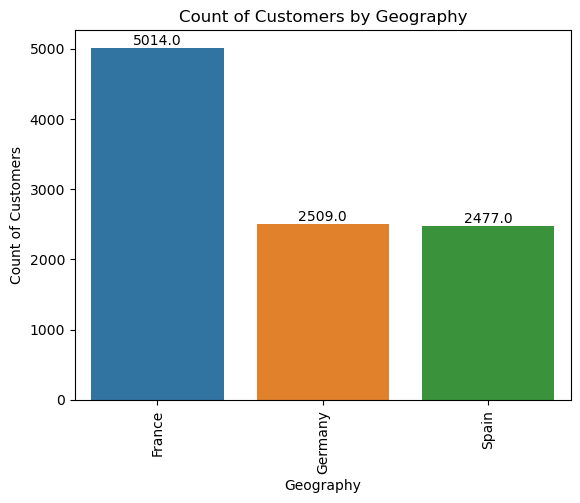

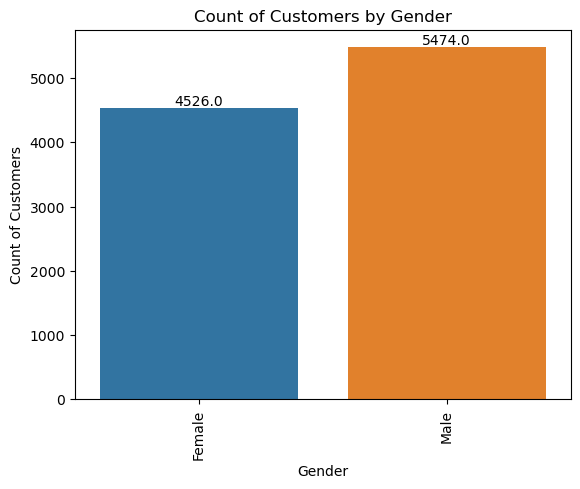

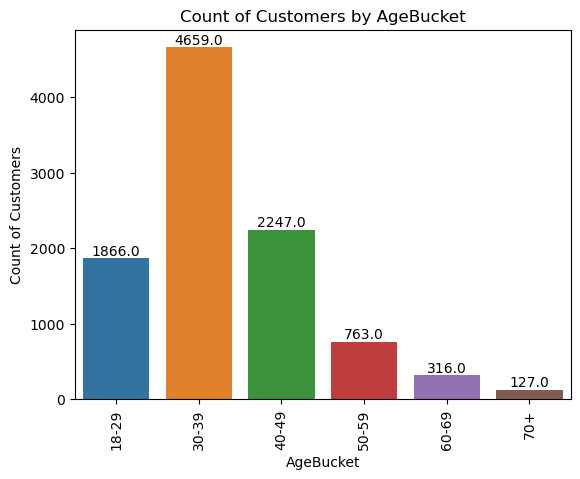

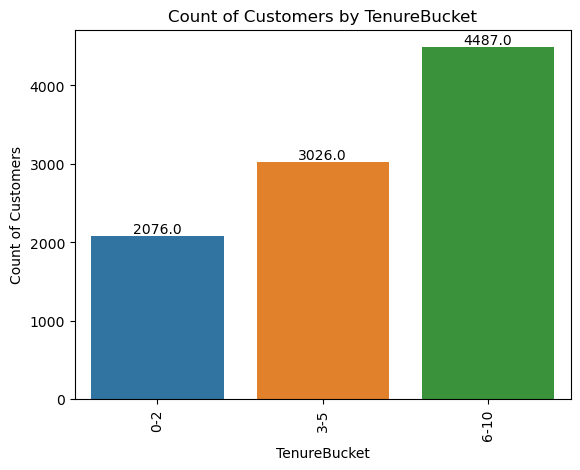

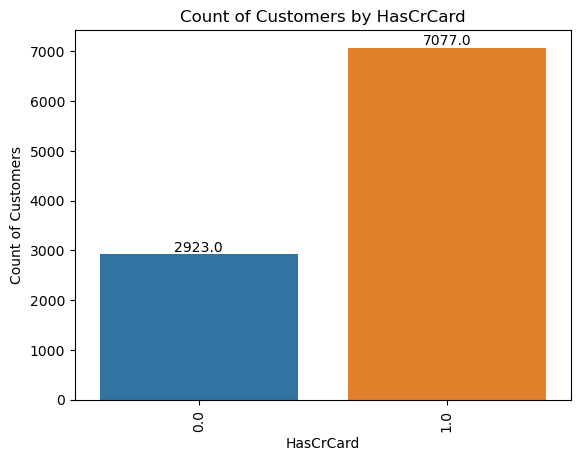

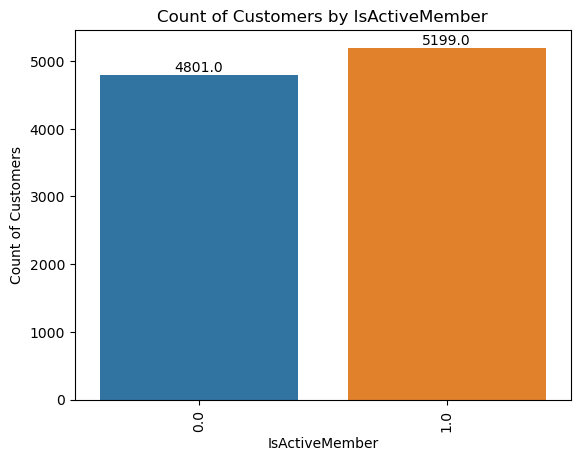

In [19]:
#Univariate analysis
cat_cols = ['Geography', 'Gender', 'AgeBucket', 'TenureBucket', 'HasCrCard', 'IsActiveMember']

for column in cat_cols:
    if column == "Geography" or column == "Gender":
        ax = sns.countplot(data=df, x=column)
        plt.title(f"Count of Customers by {column}")
        plt.xticks(rotation=90)
        plt.ylabel('Count of Customers')
        for i in ax.patches:
            ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')
        plt.show()
    else:
        ax = sns.countplot(data=df, x=column)
        plt.title(f"Count of Customers by {column}")
        plt.xticks(rotation=90)
        plt.ylabel('Count of Customers')
        for i in ax.patches:
            ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')
        plt.show()

**Findings**
1. More number of Customers are in France almost the equal size when Germany and Spain are combined
2. Male proportion is more when compared to Female customers
3. Highest number of Customers belong to 30-39 Age bucket followed by 40-49 and then by 18-29
4. Almost 70% of customers has a credit card
5. Around 52% are active members 

Continuous Variables Visualization 



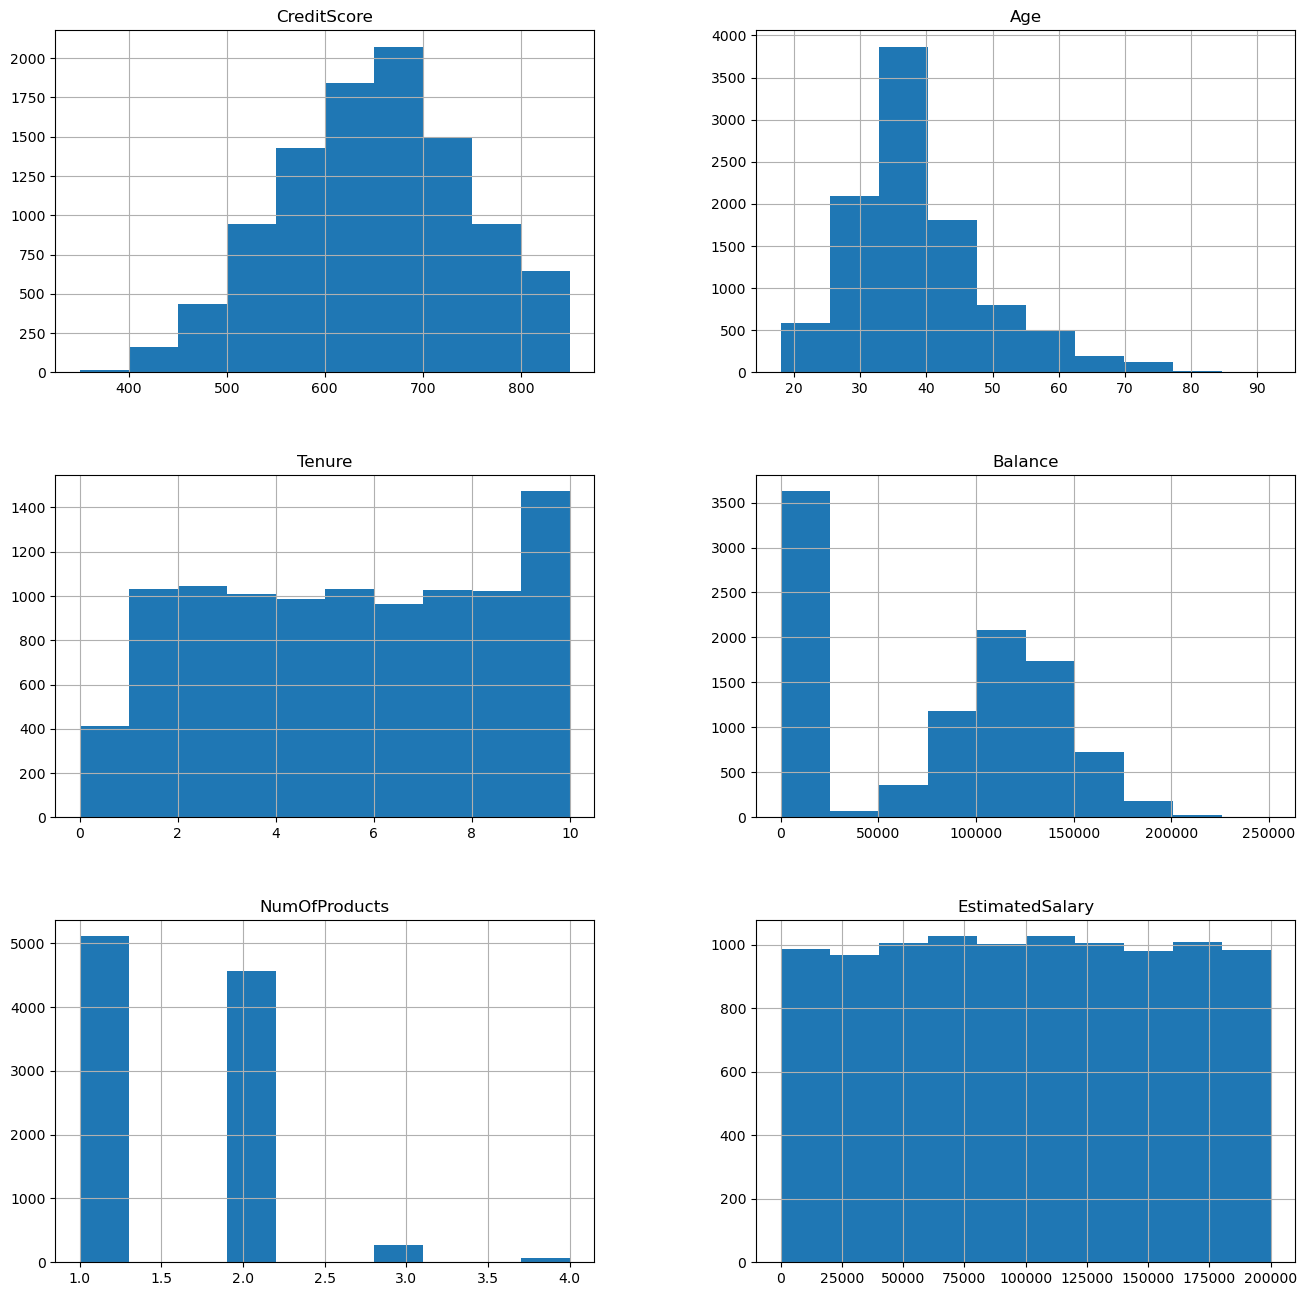

In [21]:
#Univariate analysis of continuos variables 
print("Continuous Variables Visualization","\n")
df.hist(column=num_cols,figsize=(16,16))
plt.show()

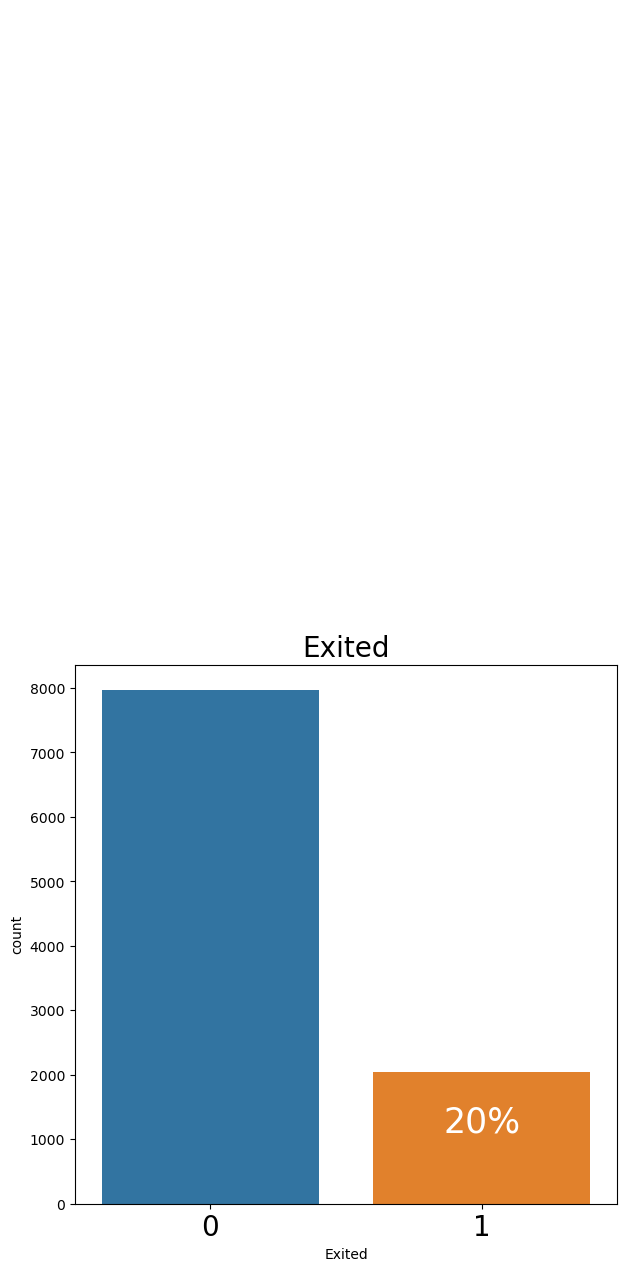

In [22]:
#Plotting the target variable
plt.figure(figsize=(7,7))
sns.countplot(x="Exited", data=df)
percentage_y = df['Exited'].agg('value_counts', normalize=True) * 100
plt.title("Exited",fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.text(0, 18000, "{:.2g}%".format(percentage_y[0]),  ha='center', va='bottom', size=25, color='w')
plt.text(1, 1000, "{:.2g}%".format(percentage_y[1]),  ha='center', va='bottom', size=25, color='w')
plt.show()

# Bivariate Analysis

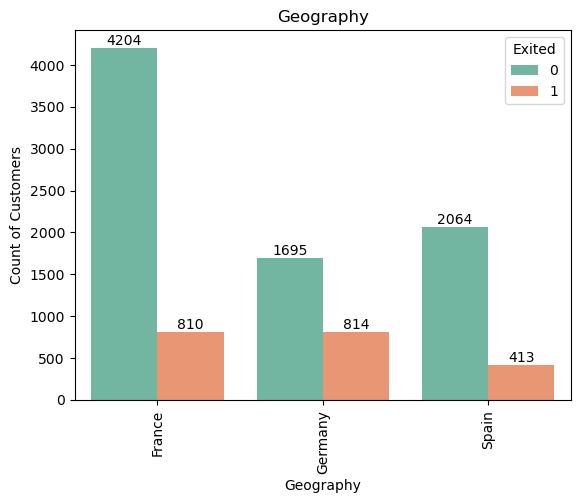

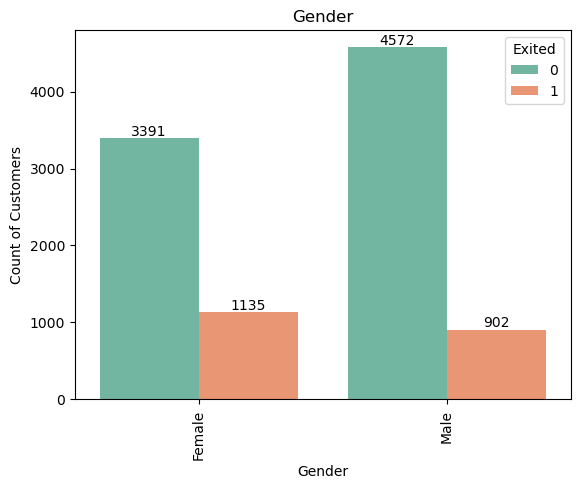

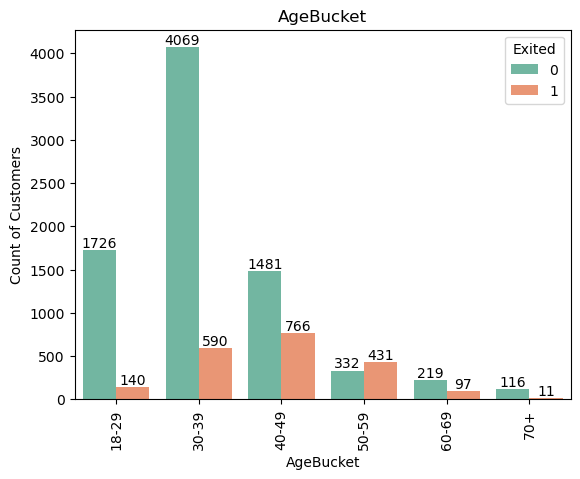

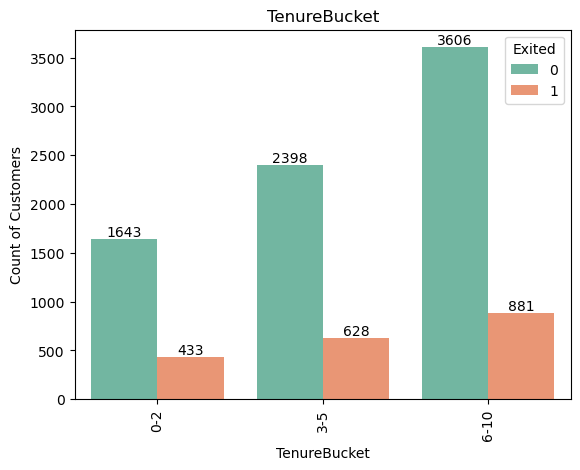

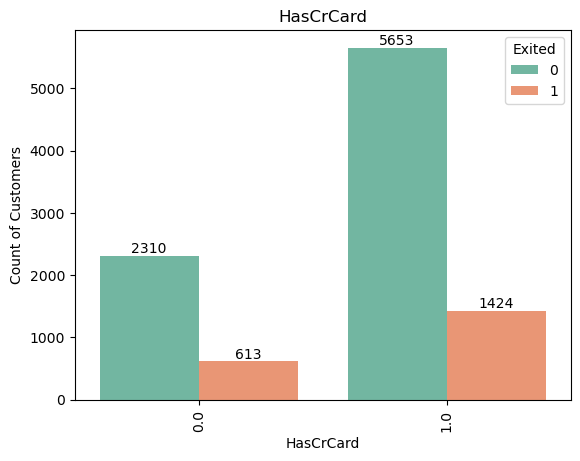

In [23]:
#Bivariate analysis
for columns in cat_cols[:-1]:
    ax = sns.countplot(x=columns,hue="Exited",data=df,palette="Set2")
    plt.title(columns)
    plt.xticks(rotation=90)
    plt.ylabel('Count of Customers')
    for i in ax.containers:
        ax.bar_label(i,)
    plt.show()

**Insights on Bivariate analysis**
1. The churn rate is high in the Germany(32.56%),Spain(20%) and France(16%)
2. Customers in the age between 50-59 have higher churn rate(56.48%) more than their retain rate, followed by 40-49 age bucket group audiences(34.81%)
3. Customers with and without credit card have equal churn rate, which is strange. 
4. Females have slightly higher churn rate when compared to Male
5. Churn rate is same almost the same across the Tenures

1. Check if the Churn rate across Age buckets is same across the countries

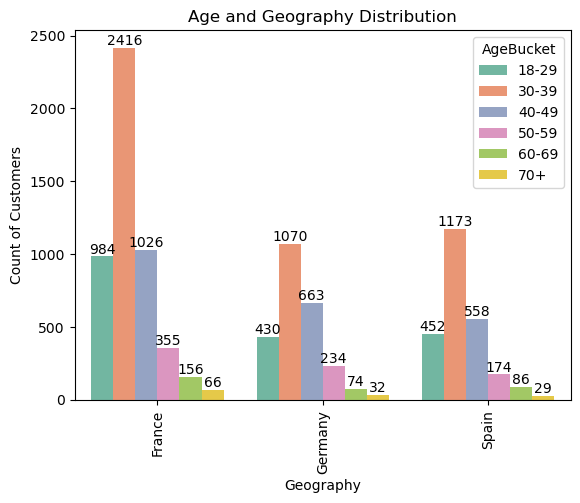

In [37]:
ax = sns.countplot(x='Geography',hue='AgeBucket',data=df,palette="Set2")
plt.title('Age and Geography Distribution')
plt.xticks(rotation=90)
plt.ylabel('Count of Customers')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

**Bivariate Analysis of Continuous variables**

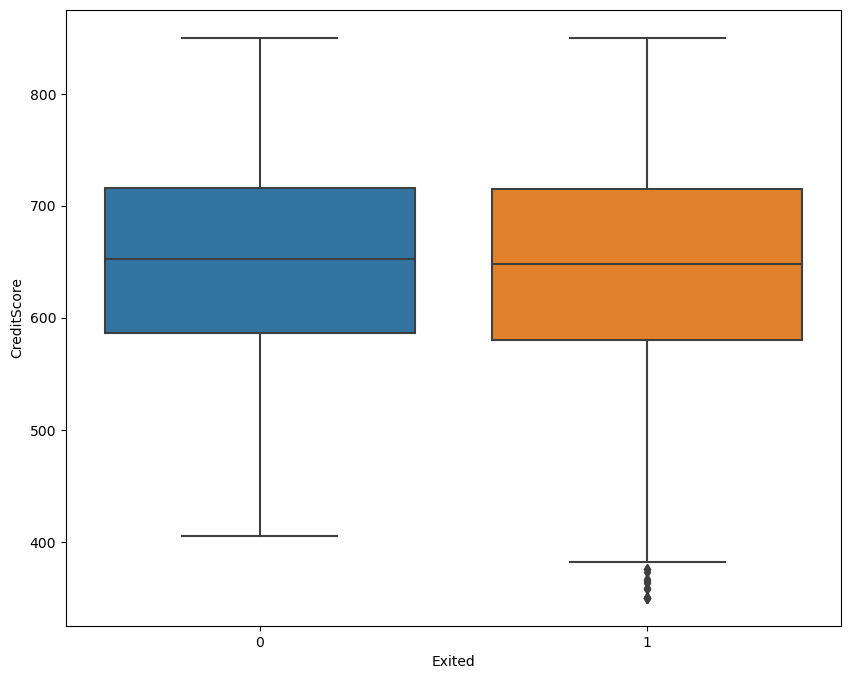

<Figure size 640x480 with 0 Axes>

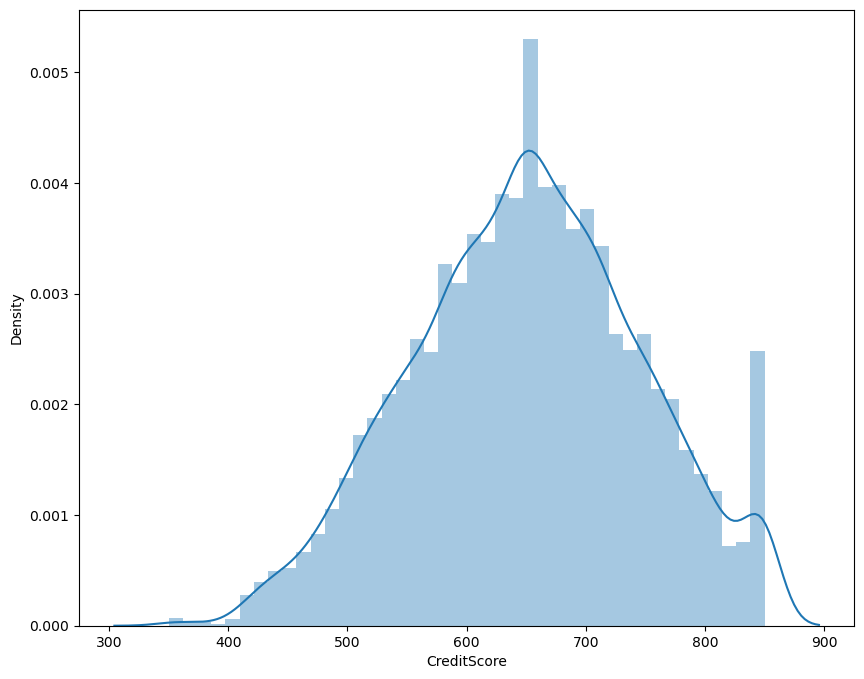

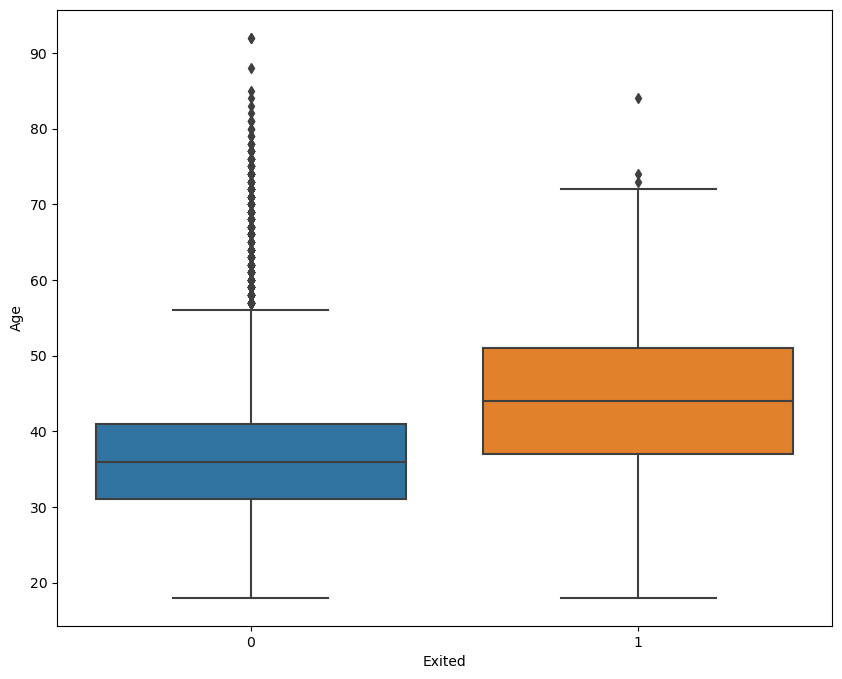

<Figure size 640x480 with 0 Axes>

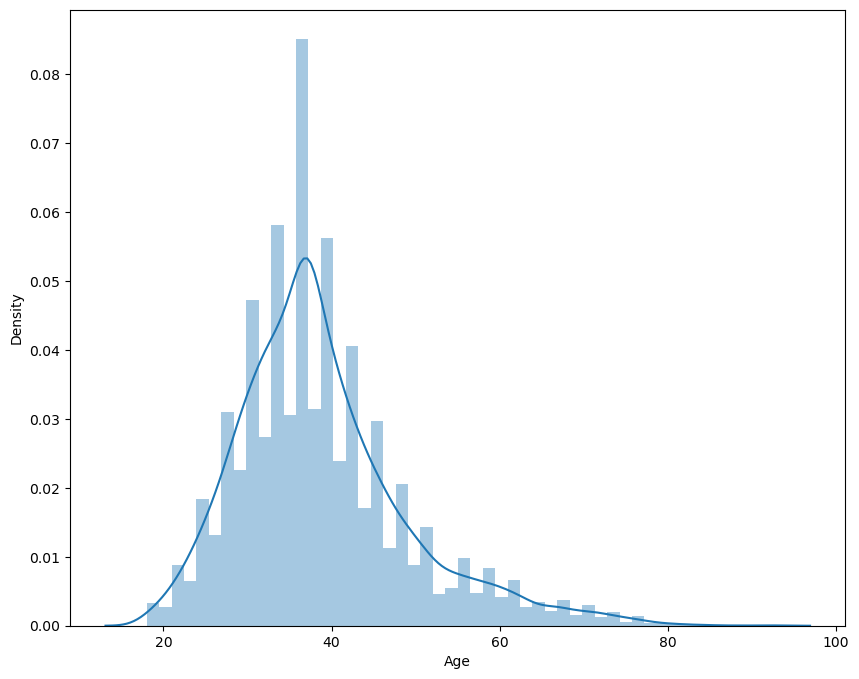

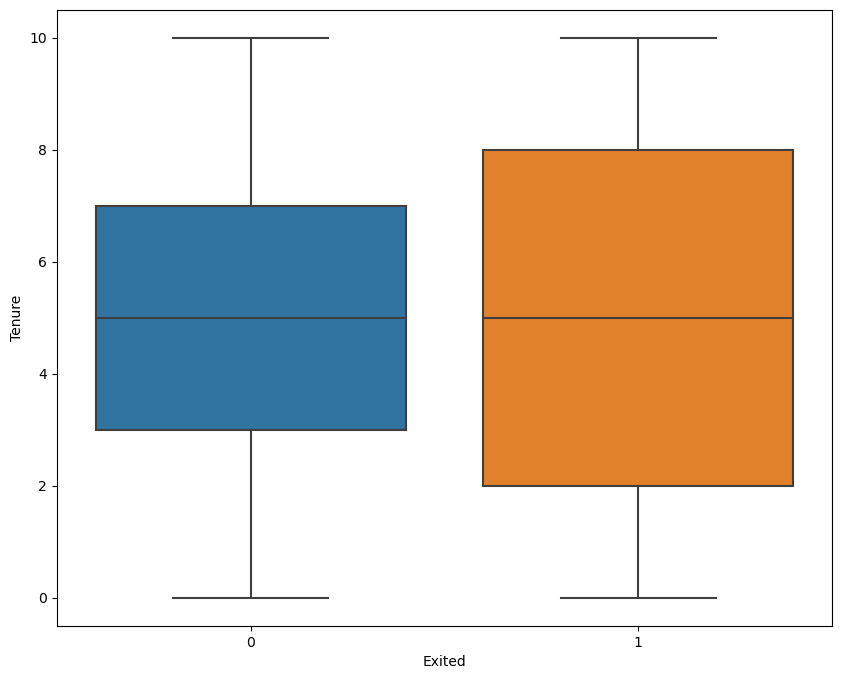

<Figure size 640x480 with 0 Axes>

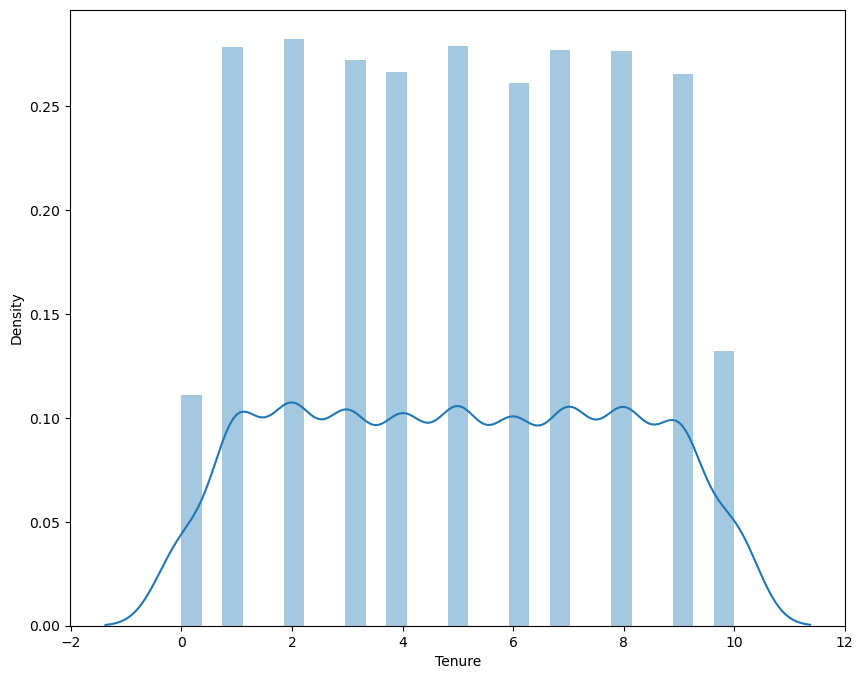

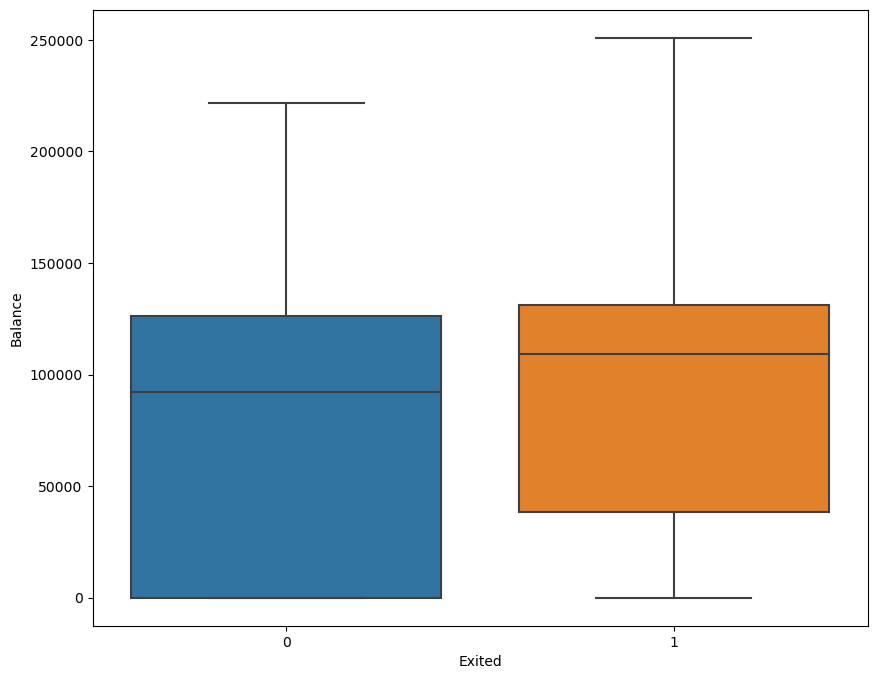

<Figure size 640x480 with 0 Axes>

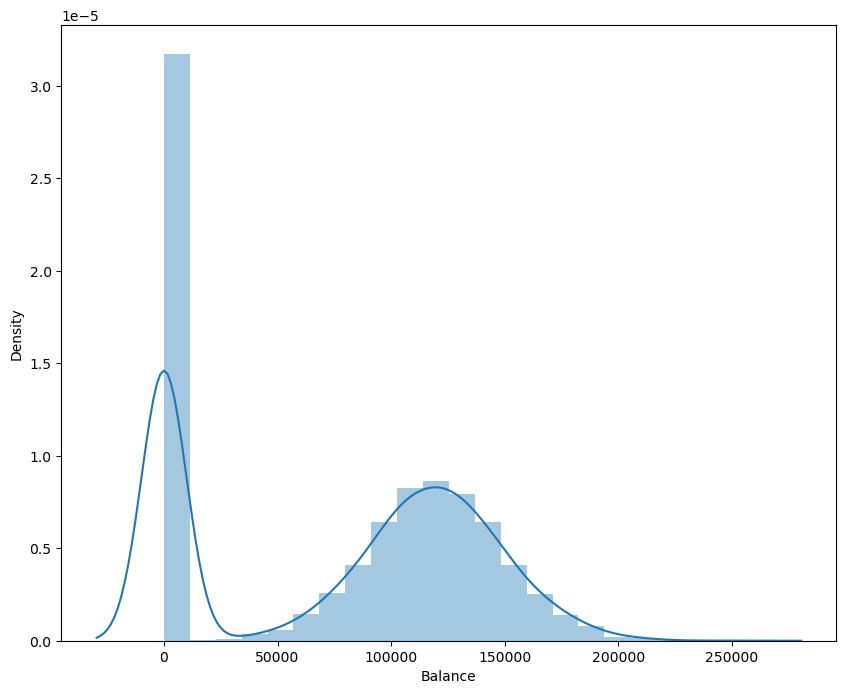

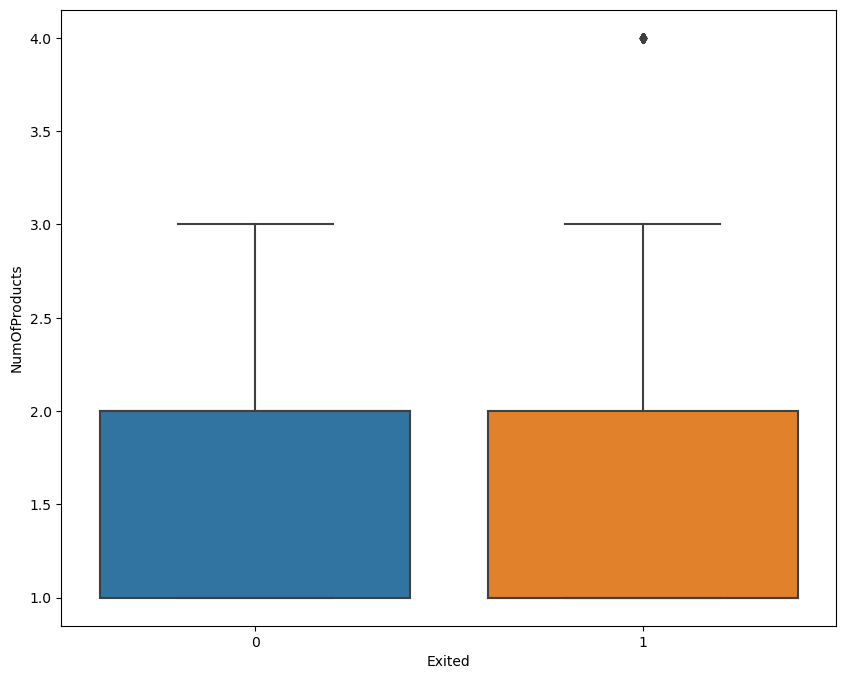

<Figure size 640x480 with 0 Axes>

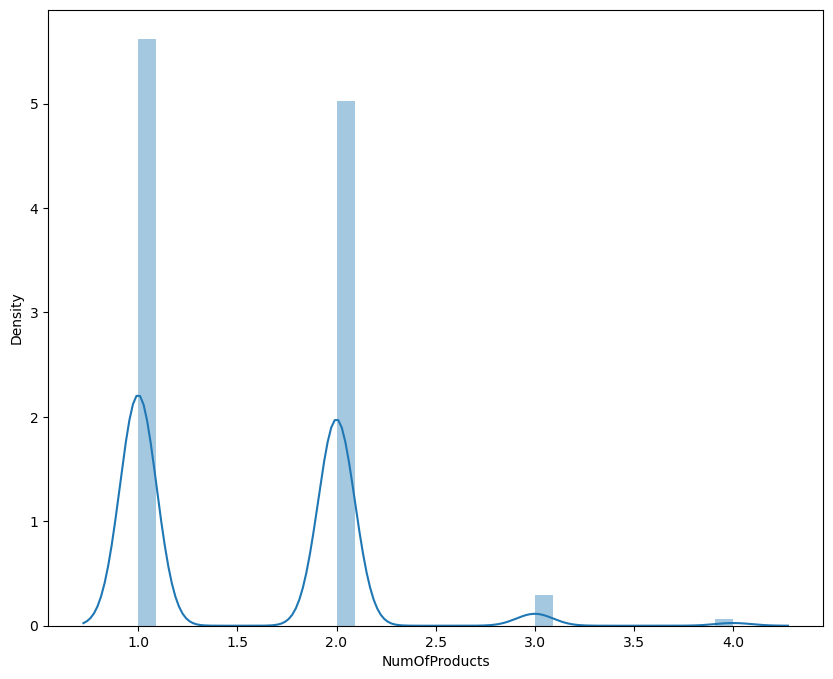

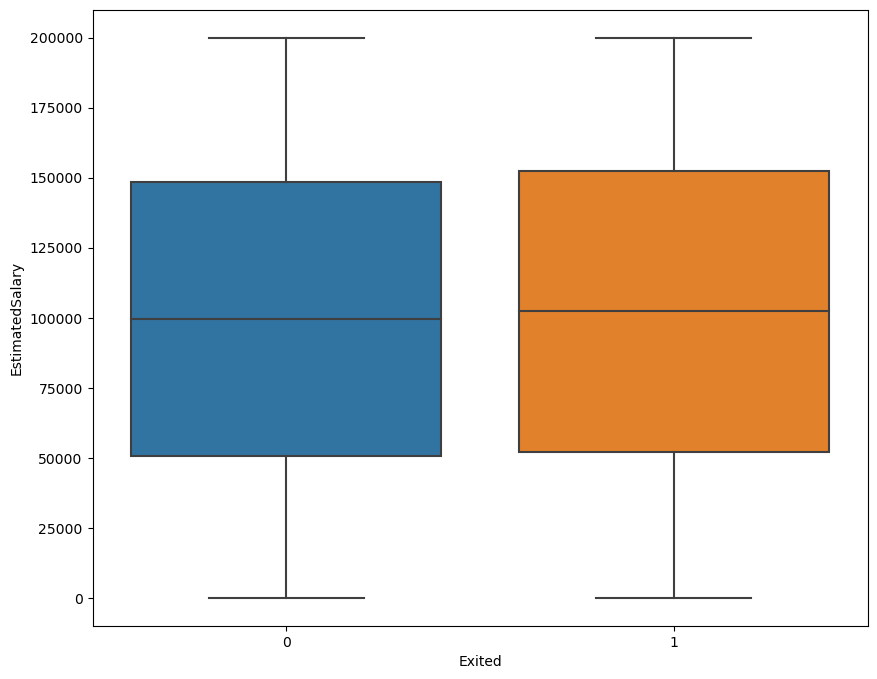

<Figure size 640x480 with 0 Axes>

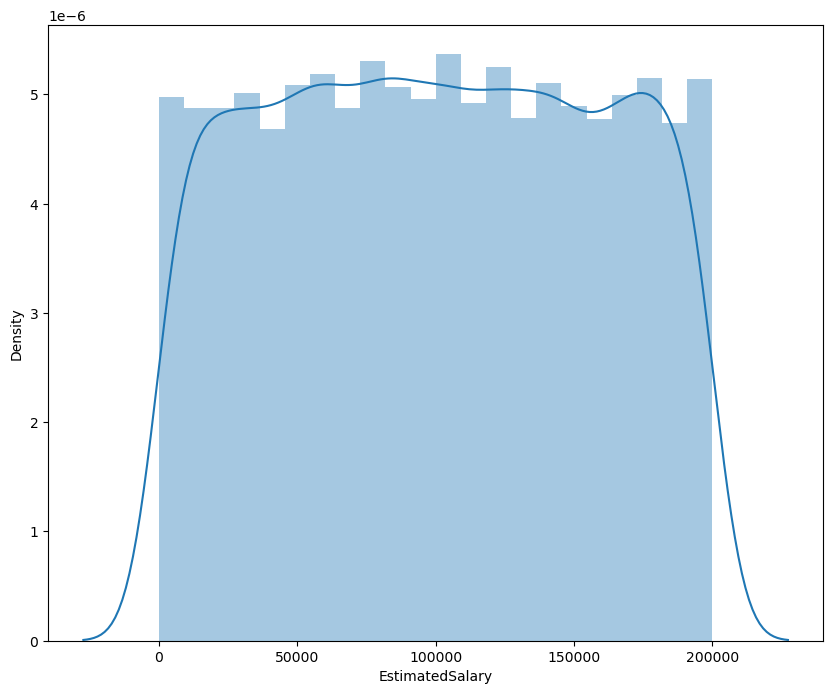

In [42]:
#Bivariate analysis of continuous variables
for i in num_cols:
    plt.figure(figsize=(10,8))
    sns.boxplot(x='Exited',y=df[i], data=df)
    plt.figure()
    plt.figure(figsize=(10,8))
    sns.distplot(df[i])
    plt.show()

People having more balance is inclined to churn. This could be bacause of other reasons such as Loan availability, Credit Card bill payments etc.  

From the above box plots as there are no columns with outliers except Age bucket and Num of Products. Hence, we are not doing any Outlier Treatment

But, if required for the Age Category, we can do the following

In [45]:
#It is evident from the above box plots, only Age has outliers
outlier_handling_col=['Age']
outlier_fun = lambda x : upper_limit if x > upper_limit else( lower_limit if x < lower_limit else x )

#Outlier treatment
for i in outlier_handling_col:
    upper_limit = df[i].mean() + 3*df[i].std()
    lower_limit = df[i].mean() - 3*df[i].std()    
    df[i] = df[i].apply(outlier_fun)

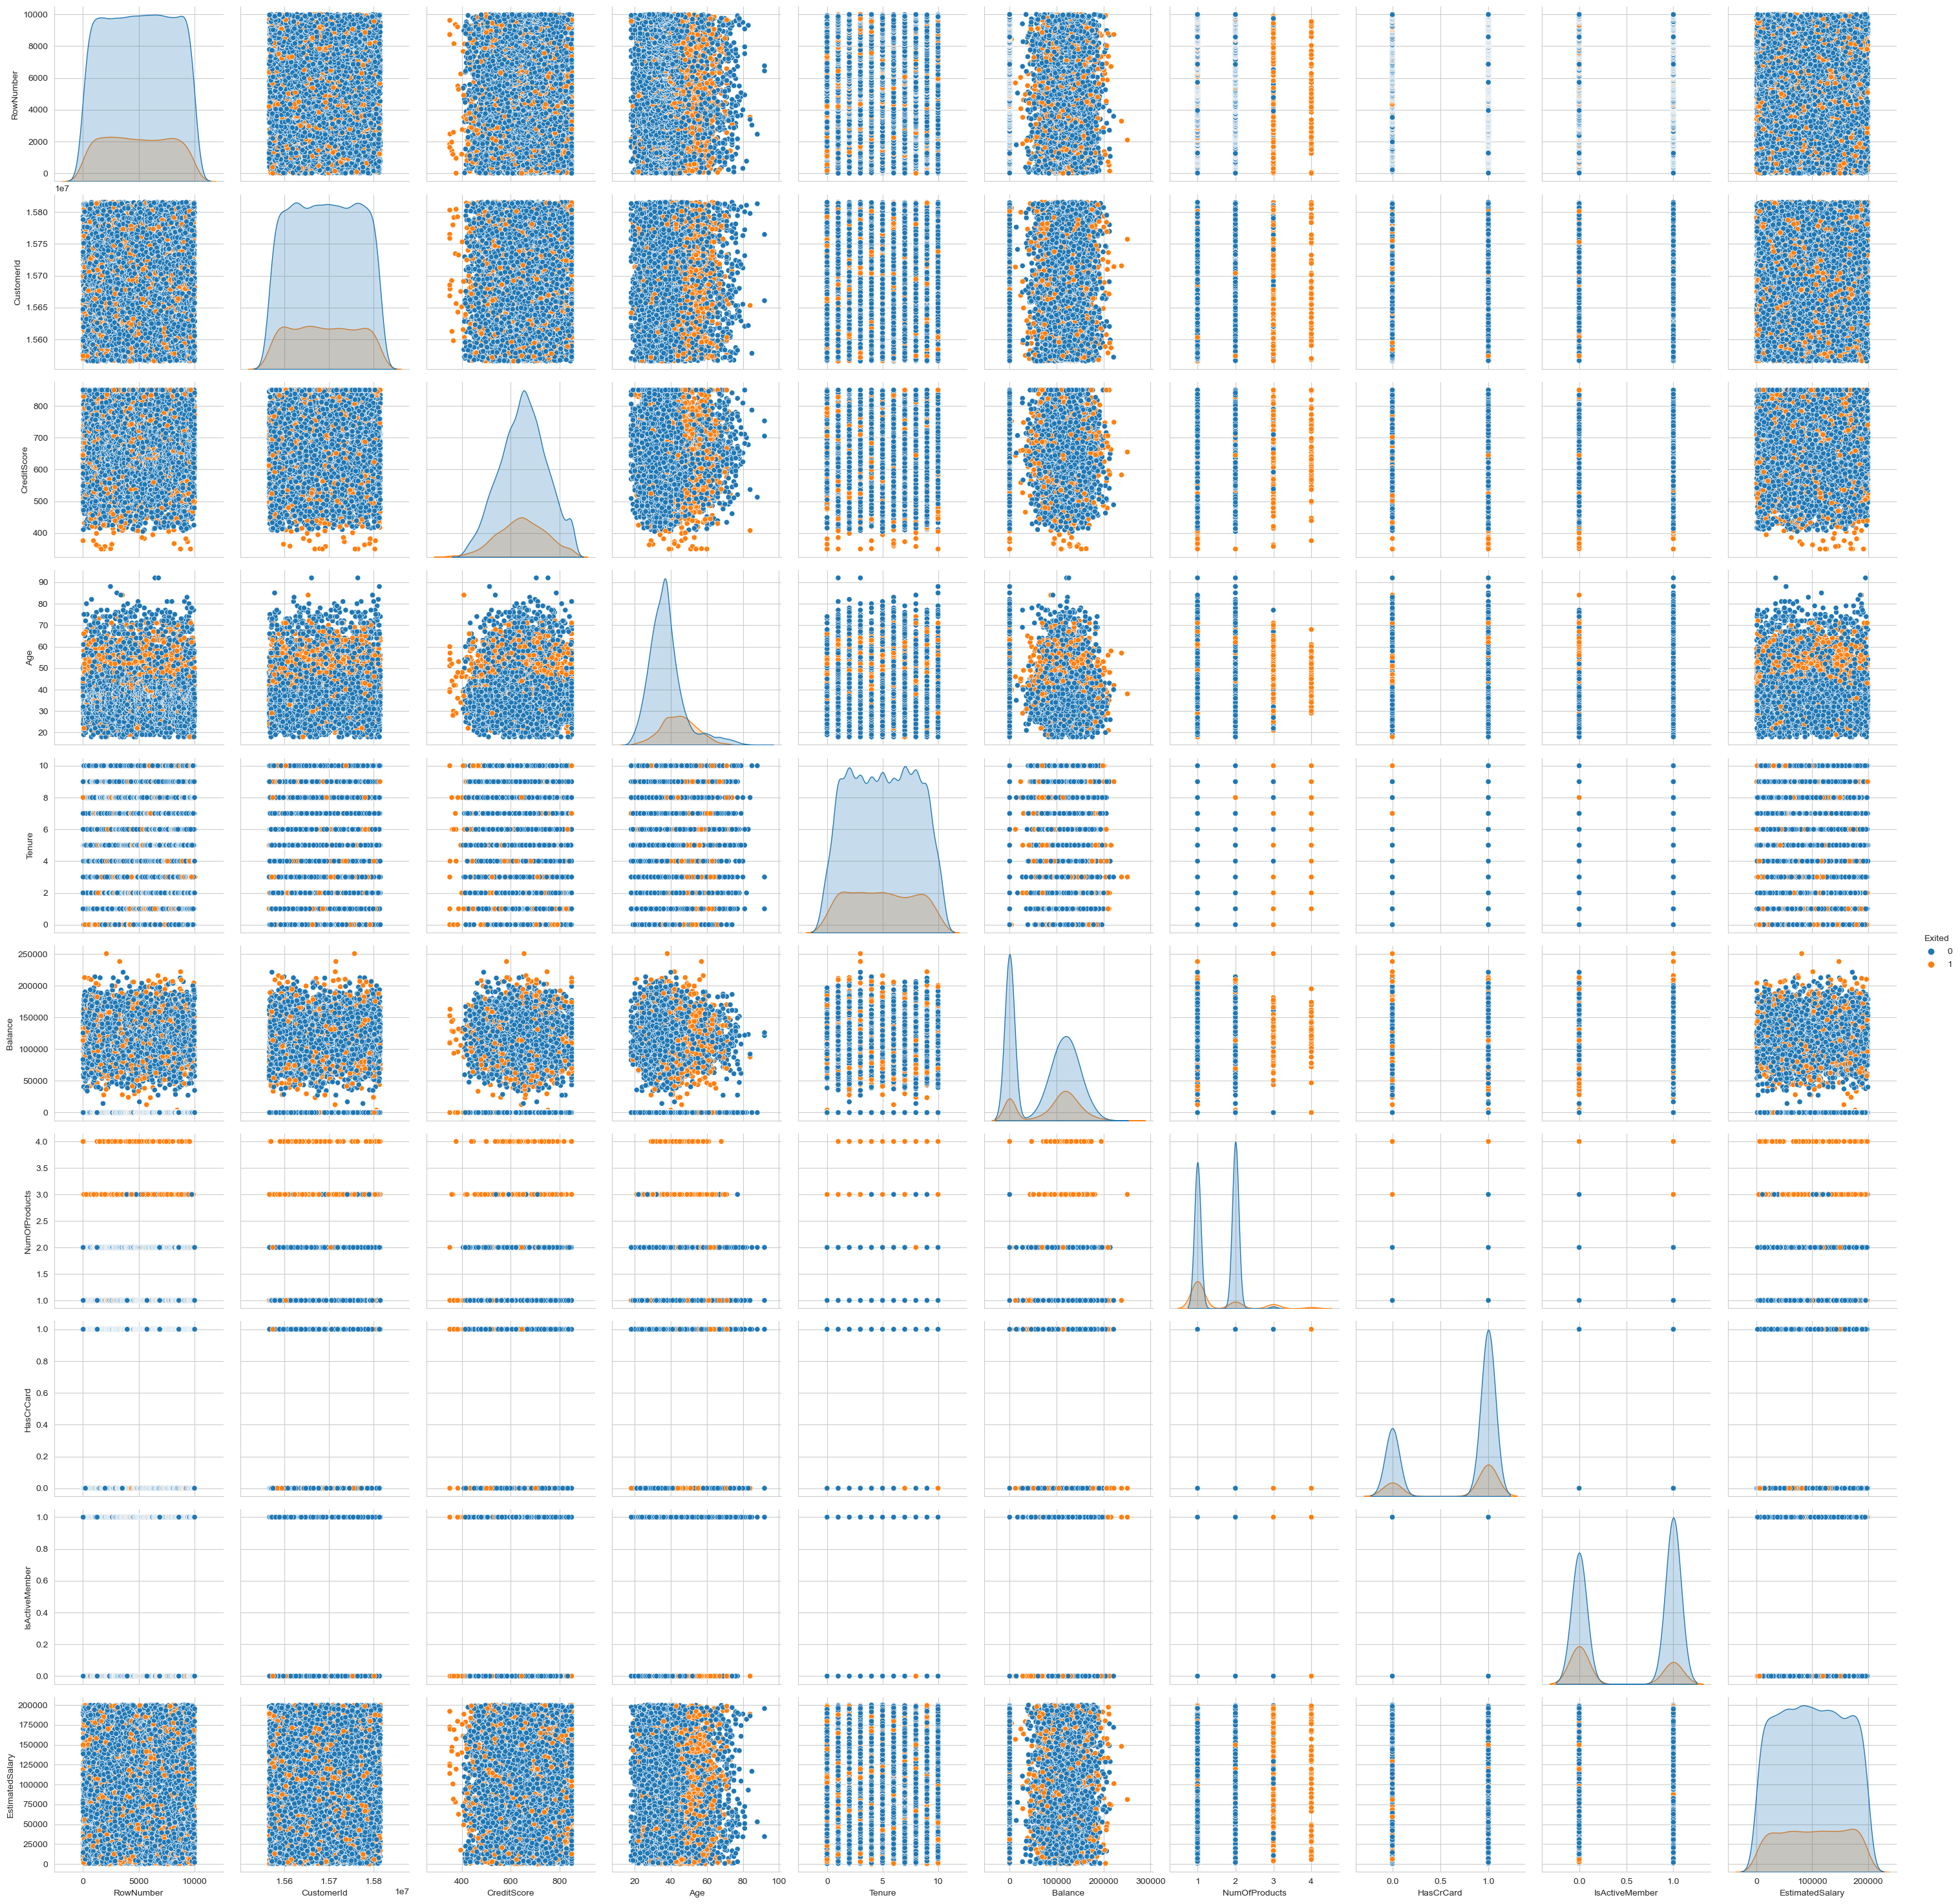

In [43]:
#Pairwise plots
sns.set_style("whitegrid");
sns.pairplot(df, hue="Exited", size=3);
plt.show()

From the above plots, we can see the distribution of target variable across two variables

In [44]:
df.corr()

RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005105  0.003830 -0.007300   
CustomerId        0.004202    1.000000     0.005147  0.005997 -0.014776   
CreditScore       0.005105    0.005147     1.000000 -0.007501  0.001502   
Age               0.003830    0.005997    -0.007501  1.000000 -0.008414   
Tenure           -0.007300   -0.014776     0.001502 -0.008414  1.000000   
Balance          -0.008985   -0.012333     0.006892  0.029745 -0.013188   
NumOfProducts     0.007369    0.015078     0.007987 -0.031595  0.012913   
HasCrCard        -0.001414   -0.012975    -0.006555 -0.012429  0.020923   
IsActiveMember    0.002534   -0.000555     0.026004  0.083615 -0.030215   
EstimatedSalary  -0.005988    0.015271    -0.001528 -0.007190  0.007908   
Exited           -0.016571   -0.006248    -0.025530  0.278822 -0.014834   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.008985       0.007369  -0.001414        0.002534   
CustomerId      -0.012333       0.015078  -0.012975       -0.000555   
CreditScore      0.006892       0.007987  -0.006555        0.026004   
Age              0.029745      -0.031595  -0.012429        0.083615   
Tenure          -0.013188       0.012913   0.020923       -0.030215   
Balance          1.000000      -0.303274  -0.013452       -0.009852   
NumOfProducts   -0.303274       1.000000   0.002824        0.008430   
HasCrCard       -0.013452       0.002824   1.000000       -0.010708   
IsActiveMember  -0.009852       0.008430  -0.010708        1.000000   
EstimatedSalary  0.012942       0.013078  -0.009285       -0.014218   
Exited           0.117939      -0.047371  -0.009600       -0.154082   

                 EstimatedSalary    Exited  
RowNumber              -0.005988 -0.016571  
CustomerId              0.015271 -0.006248  
CreditScore            -0.001528 -0.025530  
Age                    -0.007190  0.278822  
Tenure                  0.007908 -0.014834  
Balance                 0.012942  0.117939  
NumOfProducts           0.013078 -0.047371  
HasCrCard              -0.009285 -0.009600  
IsActiveMember         -0.014218 -0.154082  
EstimatedSalary         1.000000  0.012097  
Exited                  0.012097  1.000000

In [46]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.485900     38.784083      5.015000   
std     2886.89568  7.193619e+04     95.856904     10.059164      2.888358   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    585.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    716.000000     43.250000      7.000000   
max    10000.00000  1.581569e+07    850.000000     69.709179     10.000000   

             Balance  NumOfProducts     HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.000000    10000.000000   
mean    76448.941775       1.527700      0.707700        0.519900   
std     62361.939387       0.581435      0.454842        0.499629   
min         0.000000       1.000000      0.000000        0.000000   
25%         0.000000       1.000000      0.000000        0.000000   
50%     97089.635000       1.000000      1.000000        1.000000   
75%    127562.710000       2.000000      1.000000        1.000000   
max    250898.090000       4.000000      1.000000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100089.748400      0.203700  
std       57510.491042      0.402769  
min          11.000000      0.000000  
25%       51001.750000      0.000000  
50%      100193.500000      0.000000  
75%      149387.750000      0.000000  
max      199992.000000      1.000000

**Inferences**

From the above analysis, we can see that

1. The Churn rate is high on **Female** when compared to **Male**. 

2. The people in **Germany** are more inclined to churn than the remaining 2 Geographical areas.

3. Higher churn is observed in age buckets **50-59 followed by 40-49**.

4. **Estimated Salary, Tenure, Has Credit Card** do not impact the Churn Rate

Based on the inferences drawn from the analysis, here are some recommendations:

1. **Gender-Specific Strategies:** Given that the churn rate is higher among females, consider implementing gender-specific strategies. This might include personalized marketing, products, or services tailored to the needs and preferences of female customers.

2. **Focus on Germany:** Since Germany has a higher churn rate compared to other geographical areas, it's important to understand the specific factors contributing to this trend. Conduct further research or customer surveys in Germany to identify areas for improvement.

3. **Age-Targeted Campaigns:** The age buckets of 50-59 and 40-49 have higher churn rates. Create targeted campaigns or offers for customers in these age groups to retain them. These campaigns could include loyalty programs, discounts, or services tailored to the needs of customers in these age ranges.

4. **Improve Customer Engagement:** Factors like tenure, having a credit card, and estimated salary don't appear to significantly impact churn rate. Instead of focusing on these factors, consider implementing strategies to improve overall customer engagement and satisfaction. This might involve providing better customer support, enhancing the user experience, or offering more value to customers.

5. **Customer Feedback and Surveys:** To gain deeper insights into why customers are churning, consider conducting customer feedback surveys. Understanding the specific reasons for churn will help you develop targeted strategies to address these issues.

6. **Churn Prediction Models:** Implement churn prediction models that can proactively identify customers at risk of churning. This allows you to take preventive actions before customers actually churn. Machine learning models can be effective for this purpose.

7. **Customer Retention Programs:** Develop customer retention programs and loyalty initiatives to incentivize existing customers to stay with your service or product. Offering rewards, discounts, or exclusive benefits can help retain valuable customers.

8. **Competitive Analysis:** Analyze the competitive landscape to understand how your offerings compare to competitors. Identify areas where you can differentiate and improve your products or services to better meet customer needs and reduce churn.